# Data Cleaning and EDA

## About

## 1. Problem Statement

## 2. Data Cleaning

### 2.1 Import Data and Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn, Plotly and Warnings libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
import warnings

warnings.filterwarnings("ignore")

**Functions definition**

Functions for data preprocessing:

In [3]:
def describe_variable(df, var, variable_table):
    print(var, ":")
    print(
        "Unique variable description: ",
        variable_table[variable_table["new_variable_name"] == var][
            "description"
        ].unique()[0],
    )

    # Get unique values after dropping NA
    unique_vals = df[var].unique()

    # Check if the column is numeric
    if df[var].dtype in ["int64", "float64", "int32", "float32"]:
        unique_values = [float(x) for x in unique_vals]
        print("Unique values in data: ", sorted(unique_values))
    else:
        # For non-numeric (e.g., strings), keep as is and sort
        unique_values = sorted([str(x) for x in unique_vals])
        print("Unique values in data: ", unique_values)
        
    print(
        "Unique variable scheme: ",
            variable_table[variable_table["new_variable_name"] == var][
                "scheme"
            ].unique()[0],
    )

    print("-"*100)

In [4]:
def reverse_range(df, col):
    max = df[col].max()
    min = df[col].min()
    return (max + min) - df[col]

Functions for data visualization:

In [5]:
def plot_categorical(df, cols):
    for col in cols:
        plt.figure(figsize=(12, 4))
        sns.countplot(data=df, x=col)
        plt.title(f"Distribution of {col}")
        plt.xticks(rotation=45, ha="right")
        plt.show()
        print()


def plot_numerical(df, cols):
    for col in cols:
        plt.figure(figsize=(10, 6))

        plt.subplot(2, 1, 1)
        sns.histplot(data=df, x=col, kde=True)
        plt.title(f"Distribution of {col}")

        plt.subplot(2, 1, 2)
        sns.boxplot(data=df, x=col, orient="h")

        plt.tight_layout()
        plt.show()
        print()

In [6]:
def plot_stacked_barchart(df, index_column, columns_list):
    num_plots = len(columns_list)
    cols = 4
    rows = math.ceil(num_plots / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows), squeeze=False)

    for idx, col in enumerate(columns_list):
        row_idx, col_idx = divmod(idx, cols)
        ax = axes[row_idx][col_idx]

        # Pivot and normalize
        pivot_df = pd.pivot_table(
            data=df,
            index=index_column,
            columns=col,
            aggfunc="size",
            observed=False
        )
        pivot_percent = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

        # Plot
        pivot_percent.plot(kind="barh", stacked=True, ax=ax, legend=False)
        ax.set_title(f"{col} by {index_column}", fontsize=10)
        ax.set_xlabel("Percentage (%)")
        ax.set_ylabel(index_column)
        ax.tick_params(axis="x", labelrotation=45, labelsize=8)
        ax.tick_params(axis="y", labelsize=8)

        # Legend inside each subplot
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, title=col, loc="upper right", fontsize="x-small", title_fontsize="x-small")

    # Remove unused axes
    for idx in range(num_plots, rows * cols):
        row_idx, col_idx = divmod(idx, cols)
        fig.delaxes(axes[row_idx][col_idx])

    plt.tight_layout()
    plt.show()

In [7]:
def plot_scatterplot_numerical(df, x_col, y_cols):
    for y_col in y_cols:
        plt.figure(figsize=(8, 5))
        sns.scatterplot(data=df, x=x_col, y=y_col, alpha=0.6)
        plt.title(f"Scatterplot of {y_col} vs {x_col}")
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.tight_layout()
        plt.show()

**Import the data as Pandas DataFrame**

In [8]:
df = pd.read_excel("../data/Marital satisfaction_Data.xlsx")

**Show Top 5 Records**

In [9]:
df.head()

,Country,"Sex (1-M, 2-F)",Age,Marriage duration (years),Number of children,Number of brought up children,"Education (1-no formal education, 2-primary school, 3-secondary school, 4-high school or technical college, 5-bachelor or master degree)","Material status (1-much better than average in my country, 2-better than average in my country, 3-similar to average in my country, 4-worse than average in my country, 5-much worse than average in my country)","Religion (1-Protestant, 2-Catholic, 3-Jewish, 4-Muslim, 5-Buddhist, 6-None, 7-Jehovah, 8-Evangelic, 9-Spiritualism, 10-Other - very specific, 11-Orthodox, 12-Hinduism)","Religiosity (1-not religious at all, 7-extremely religious)",...,Unnamed: 21,Unnamed: 22,"Collectivism-Individualism (GLOBE survey) (1-strongly agree, 4-neither agree nor disagree, 7-strongly disagree)",Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,Item number,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,21.0,22.0,1,2.0,3.0,4.0,1,2.0,3.0,4.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,National level,NaN,NaN,NaN,Individual level,NaN,NaN,NaN
2,Brazil,1.0,21.0,2.0,0.0,0.0,5.0,3.0,1.0,4.0,...,7.0,7.0,1,1.0,1.0,1.0,1,1.0,1.0,1.0
3,Brazil,1.0,29.0,3.0,1.0,0.0,5.0,3.0,1.0,6.0,...,6.0,6.0,2,1.0,1.0,1.0,1,1.0,1.0,1.0
4,Brazil,1.0,30.0,7.0,0.0,0.0,5.0,3.0,1.0,4.0,...,7.0,7.0,2,1.0,2.0,1.0,1,1.0,1.0,1.0


In [10]:
variable_table = pd.read_excel("../data/variable_table.xlsx")
variable_table.head()

,survey_item,new_variable_name,type,maslow_type,description,scheme
0,Country,country,Nominal,NaN,Country,-
1,Sex,sex,Nominal,NaN,Sex,"1-Male, 2-Female"
2,Age,age,Discrete,NaN,Age (in years),-
3,Marriage duration,marriage_duration,Continuous,NaN,For how long have you been married (in years)?,-
4,Number of children,num_children,Discrete,NaN,How many children do you have?,-


In [11]:
df_cleaned = df.copy()

### 2.2 Variable Mapping

**Replace column names from raw data with new variable names and drop first two rows.**

In [12]:
new_columns = variable_table['new_variable_name'].values
new_columns

array(['country', 'sex', 'age', 'marriage_duration', 'num_children',
       'num_brought_up_children', 'education', 'physio', 'religion',
       'religiosity', 'safety', 'love1', 'happy', 'esteem1', 'love2',
       'love3', 'esteem2', 'sact', 'love4', 'love5', 'ms1', 'ms2', 'ms3',
       'globe1', 'globe2', 'globe3', 'globe4', 'globe5', 'globe6',
       'globe7', 'globe8'], dtype=object)

In [13]:
# Drop the first two row
df_cleaned = df_cleaned.iloc[2:]

# Replace new column names
df_cleaned.columns = new_columns

# Reset index
df_cleaned = df_cleaned.reset_index(drop=True)

df_cleaned.head()

,country,sex,age,marriage_duration,num_children,num_brought_up_children,education,physio,religion,religiosity,...,ms2,ms3,globe1,globe2,globe3,globe4,globe5,globe6,globe7,globe8
0,Brazil,1.0,21.0,2.0,0.0,0.0,5.0,3.0,1.0,4.0,...,7.0,7.0,1,1.0,1.0,1.0,1,1.0,1.0,1.0
1,Brazil,1.0,29.0,3.0,1.0,0.0,5.0,3.0,1.0,6.0,...,6.0,6.0,2,1.0,1.0,1.0,1,1.0,1.0,1.0
2,Brazil,1.0,30.0,7.0,0.0,0.0,5.0,3.0,1.0,4.0,...,7.0,7.0,2,1.0,2.0,1.0,1,1.0,1.0,1.0
3,Brazil,1.0,30.0,7.0,1.0,1.0,5.0,3.0,1.0,6.0,...,6.0,6.0,3,1.0,1.0,2.0,1,1.0,1.0,1.0
4,Brazil,1.0,28.0,9.0,0.0,0.0,4.0,2.0,1.0,5.0,...,6.0,7.0,3,2.0,3.0,2.0,1,1.0,1.0,1.0


### 2.3 Remove Duplicates

**Check duplicated rows**

In [14]:
# Binary mapping to check for duplicates
duplicates_bm = df_cleaned.duplicated(keep=False)
df_cleaned[duplicates_bm]

,country,sex,age,marriage_duration,num_children,num_brought_up_children,education,physio,religion,religiosity,...,ms2,ms3,globe1,globe2,globe3,globe4,globe5,globe6,globe7,globe8
497,Bulgaria,1.0,50.0,28.0,2.0,1.0,3.0,3.0,11.0,2.0,...,4.0,3.0,2,1.0,2.0,1.0,1,1.0,6.0,1.0
498,Bulgaria,1.0,50.0,28.0,2.0,1.0,3.0,3.0,11.0,2.0,...,4.0,3.0,2,1.0,2.0,1.0,1,1.0,6.0,1.0
2167,India,1.0,37.0,11.0,2.0,2.0,5.0,3.0,1.0,5.0,...,6.0,7.0,1,1.0,1.0,1.0,1,1.0,1.0,1.0
2168,India,1.0,37.0,11.0,2.0,2.0,5.0,3.0,1.0,5.0,...,6.0,7.0,1,1.0,1.0,1.0,1,1.0,1.0,1.0
2187,India,2.0,30.0,2.0,1.0,1.0,5.0,2.0,4.0,4.0,...,7.0,7.0,1,1.0,1.0,2.0,1,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6704,Turkey,1.0,27.0,8.0,2.0,2.0,2.0,1.0,4.0,7.0,...,7.0,7.0,1,1.0,1.0,1.0,1,1.0,1.0,1.0
6705,Turkey,1.0,27.0,8.0,2.0,2.0,2.0,1.0,4.0,7.0,...,7.0,7.0,1,1.0,1.0,1.0,1,1.0,1.0,1.0
6706,Turkey,1.0,26.0,1.0,1.0,1.0,3.0,1.0,4.0,7.0,...,7.0,7.0,1,1.0,1.0,1.0,1,1.0,1.0,1.0
6707,Turkey,1.0,26.0,1.0,1.0,1.0,3.0,1.0,4.0,7.0,...,7.0,7.0,1,1.0,1.0,1.0,1,1.0,1.0,1.0


This shows that there are duplicate rows in the dataset, and almost all of these duplicates comes right after the original occurences, assuming that the respondence might have keyed in the same survey multiple times. Thus, it is safe to remove the duplicated rows, since they are not meaningful.

In [15]:
# Drop duplicates and reset index
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned = df_cleaned.reset_index(drop=True)

# Check any duplicates
print(df_cleaned.duplicated().sum())

0


### 2.4 Handle Missing Data

**Check if any missing values in dataset**

In [16]:
print(df_cleaned.isna().sum())

country                     0
sex                         0
age                         0
marriage_duration           0
num_children                0
num_brought_up_children     0
education                   0
physio                      0
religion                   85
religiosity                 0
safety                      0
love1                       0
happy                       0
esteem1                     0
love2                       0
love3                       0
esteem2                     0
sact                        0
love4                       0
love5                       0
ms1                         0
ms2                         0
ms3                         0
globe1                      0
globe2                      0
globe3                      0
globe4                      0
globe5                      0
globe6                      0
globe7                      0
globe8                      0
dtype: int64


religion column contains 85 missing values

In [17]:
describe_variable(df_cleaned, "religion", variable_table)

religion :
Unique variable description:  What is your current religious affiliation?
Unique values in data:  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0, 10.0, nan, 8.0, 11.0, 12.0]
Unique variable scheme:  1-Protestant, 2-Catholic,  3-Jewish, 4-Muslim, 5-Buddhist, 6-None, 7-Jehovah, 8-Evangelic, 9-Spiritualism, 10-Other - very specific, 11-Orthodox, 12-Hinduism
----------------------------------------------------------------------------------------------------


In [18]:
missing_religion = df_cleaned[df_cleaned["religion"].isna()]

for col in [c for c in df_cleaned.columns if c != "religion"]:
    print(f"{col}:")
    print(missing_religion[col].unique())
    print("-" * 40)

country:
['Brazil ' 'Croatia' 'Estonia' 'Ghana' 'Greece' 'Iran ' 'Italy' 'Mexico'
 'Nigeria ' 'Poland ' 'Portugal' 'Russia' 'Switzerland' 'Uganda']
----------------------------------------
sex:
[1. 2.]
----------------------------------------
age:
[33. 37. 23. 35. 47. 72. 51. 46. 30. 69. 48. 42. 29. 41. 67. 54. 53. 39.
 36. 74. 52. 34. 43. 32. 25. 28. 27. 57. 40. 24. 60. 31. 26. 50. 58.]
----------------------------------------
marriage_duration:
[ 5.   18.    2.   10.    7.   47.   29.   23.   43.    1.   21.    4.
 24.   32.    6.   11.   27.    0.8   0.75  1.5  12.   22.    3.    8.
 39.   36.   15.   13.   25.    9.   19.   38.   30.   26.  ]
----------------------------------------
num_children:
[2. 0. 1. 3. 4. 5. 7. 6. 8.]
----------------------------------------
num_brought_up_children:
[2. 3. 0. 1. 4. 5. 9.]
----------------------------------------
education:
[3. 2. 5. 4. 1.]
----------------------------------------
physio:
[3. 1. 2. 4. 6.]
-------------------------------------

No significant pattern on which category of user filled na value, so assume na value was generated by system error or user skipped the question.

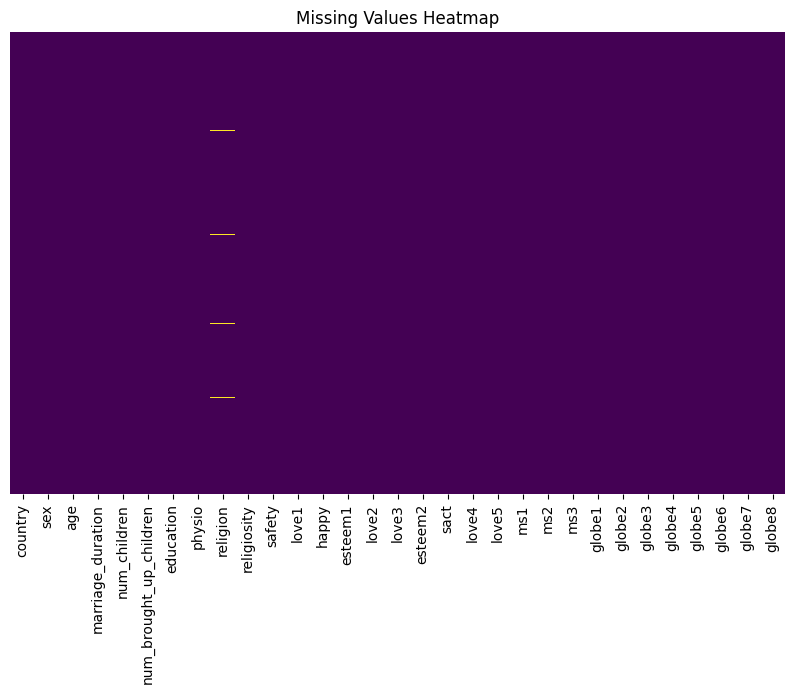

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.isna(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

Only very fill missing data from religion, hence is safe to remove.

In [20]:
df_cleaned = df_cleaned.dropna(subset=["religion"])

In [21]:
print(df_cleaned.isna().sum())

country                    0
sex                        0
age                        0
marriage_duration          0
num_children               0
num_brought_up_children    0
education                  0
physio                     0
religion                   0
religiosity                0
safety                     0
love1                      0
happy                      0
esteem1                    0
love2                      0
love3                      0
esteem2                    0
sact                       0
love4                      0
love5                      0
ms1                        0
ms2                        0
ms3                        0
globe1                     0
globe2                     0
globe3                     0
globe4                     0
globe5                     0
globe6                     0
globe7                     0
globe8                     0
dtype: int64


### 2.5 Data Type Checking

In [22]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7037 entries, 0 to 7117
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  7037 non-null   object 
 1   sex                      7037 non-null   float64
 2   age                      7037 non-null   float64
 3   marriage_duration        7037 non-null   float64
 4   num_children             7037 non-null   float64
 5   num_brought_up_children  7037 non-null   float64
 6   education                7037 non-null   float64
 7   physio                   7037 non-null   float64
 8   religion                 7037 non-null   float64
 9   religiosity              7037 non-null   float64
 10  safety                   7037 non-null   float64
 11  love1                    7037 non-null   float64
 12  happy                    7037 non-null   float64
 13  esteem1                  7037 non-null   float64
 14  love2                    7037

**Describe the data with each variable's unique values.**

In [23]:
for col in sorted(df_cleaned.columns):
    describe_variable(df_cleaned, col, variable_table)

age :
Unique variable description:  Age (in years)
Unique values in data:  [17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 38.5, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0]
Unique variable scheme:  -
----------------------------------------------------------------------------------------------------
country :
Unique variable description:  Country
Unique values in data:  ['Brazil ', 'Bulgaria', 'Canada', 'China', 'Croatia', 'Estonia', 'Germany', 'Ghana', 'Greece', 'HongKong', 'Hungary', 'India', 'Indonesia', 'Iran ', 'Italy', 'Kazakhstan', 'Kenia', 'Malaysia', 'Mexico', 'Nigeria ', 'Pakistan', 'Poland ', 'Portugal', 'Romania', 'Russia', 'Saudi Arabia',

**Data types definition**

In [24]:
marital_satisfaction_columns = ["ms1", "ms2", "ms3"]

love_columns = [("love" + str(i)) for i in range(1, 6)]
esteem_columns = [("esteem" + str(i)) for i in range(1, 3)]
happy_columns = ["happy"]
physio_columns = ["physio"]
sact_columns = ["sact"]
safety_columns = ["safety"]
globe_columns = [("globe" + str(i)) for i in range(1, 9)]
maslow_columns = love_columns + esteem_columns + happy_columns + physio_columns + sact_columns + safety_columns

ordinal_columns = ["education", "religiosity"] + maslow_columns + globe_columns
nominal_columns = ["country", "sex", "religion"]

categorical_columns = ordinal_columns + nominal_columns
numerical_columns = ["age", "num_children", "num_brought_up_children"]

There are some issues to fix:

1) globe1 and globe5 are object type, but they are numbers. Seems like no issue for the values of those attributes, let's turn them to int64. Let's just change all the ordinal data columns, marital satisfaction columns, religion, num_children and num_brought_up_children data type to int64.

2) Some attributes have a range exceeding the boundary, that are: love1, love4, love5, physio, sact

Issue 1 fix:

In [25]:
convert_int_columns = ordinal_columns + marital_satisfaction_columns + ["religion", "num_children", "num_brought_up_children"]

for col in convert_int_columns:
    df_cleaned[col] = df_cleaned[col].astype(np.int64)

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7037 entries, 0 to 7117
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  7037 non-null   object 
 1   sex                      7037 non-null   float64
 2   age                      7037 non-null   float64
 3   marriage_duration        7037 non-null   float64
 4   num_children             7037 non-null   int64  
 5   num_brought_up_children  7037 non-null   int64  
 6   education                7037 non-null   int64  
 7   physio                   7037 non-null   int64  
 8   religion                 7037 non-null   int64  
 9   religiosity              7037 non-null   int64  
 10  safety                   7037 non-null   int64  
 11  love1                    7037 non-null   int64  
 12  happy                    7037 non-null   int64  
 13  esteem1                  7037 non-null   int64  
 14  love2                    7037

Issue 2 fix:

In [26]:
exceeded_range_attr = ["love1", "love4", "love5", "physio", "sact"]

for col in exceeded_range_attr:
    describe_variable(df_cleaned, col, variable_table)

love1 :
Unique variable description:  Do you enjoy your husband’s/wife’s company?
Unique values in data:  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
Unique variable scheme:  1-yes, 3-neither yes nor no, 5-no
----------------------------------------------------------------------------------------------------
love4 :
Unique variable description:  Does your relationship have a romantic side?
Unique values in data:  [1.0, 2.0, 3.0, 4.0, 5.0, 7.0]
Unique variable scheme:  1-yes, 3-neither yes nor no, 5-no
----------------------------------------------------------------------------------------------------
love5 :
Unique variable description:  Do you love your husband/wife?
Unique values in data:  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
Unique variable scheme:  1-yes, 3-neither yes nor no, 5-no
----------------------------------------------------------------------------------------------------
physio :
Unique variable description:  My material situation is
Unique values in data:  [1.0, 2.0, 3.0, 4.0, 5.0, 6.

These values are treated as outliers that most likely caused by error, so replace those value that exceeds the boundary with the max of scale.

In [27]:
for col in exceeded_range_attr:
    df_cleaned[col] = df_cleaned[col].apply(
        lambda x: 5 if x > 5 else x
    )
    describe_variable(df_cleaned, col, variable_table)

love1 :
Unique variable description:  Do you enjoy your husband’s/wife’s company?
Unique values in data:  [1.0, 2.0, 3.0, 4.0, 5.0]
Unique variable scheme:  1-yes, 3-neither yes nor no, 5-no
----------------------------------------------------------------------------------------------------
love4 :
Unique variable description:  Does your relationship have a romantic side?
Unique values in data:  [1.0, 2.0, 3.0, 4.0, 5.0]
Unique variable scheme:  1-yes, 3-neither yes nor no, 5-no
----------------------------------------------------------------------------------------------------
love5 :
Unique variable description:  Do you love your husband/wife?
Unique values in data:  [1.0, 2.0, 3.0, 4.0, 5.0]
Unique variable scheme:  1-yes, 3-neither yes nor no, 5-no
----------------------------------------------------------------------------------------------------
physio :
Unique variable description:  My material situation is
Unique values in data:  [1.0, 2.0, 3.0, 4.0, 5.0]
Unique variable scheme

## 2.6 Range reversal

In [28]:
for col in ordinal_columns + marital_satisfaction_columns:
    describe_variable(df_cleaned, col, variable_table)

education :
Unique variable description:  Education
Unique values in data:  [1.0, 2.0, 3.0, 4.0, 5.0]
Unique variable scheme:  1-no formal education, 2-primary school, 3-secondary school, 4-high school or technical college, 5-bachelor or master degree
----------------------------------------------------------------------------------------------------
religiosity :
Unique variable description:  Are you religious?
Unique values in data:  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
Unique variable scheme:  1-not religious at all, 7-extremely religious
----------------------------------------------------------------------------------------------------
love1 :
Unique variable description:  Do you enjoy your husband’s/wife’s company?
Unique values in data:  [1.0, 2.0, 3.0, 4.0, 5.0]
Unique variable scheme:  1-yes, 3-neither yes nor no, 5-no
----------------------------------------------------------------------------------------------------
love2 :
Unique variable description:  Do you enjoy doing thi

In [29]:
df_cleaned.head()

,country,sex,age,marriage_duration,num_children,num_brought_up_children,education,physio,religion,religiosity,...,ms2,ms3,globe1,globe2,globe3,globe4,globe5,globe6,globe7,globe8
0,Brazil,1.0,21.0,2.0,0,0,5,3,1,4,...,7,7,1,1,1,1,1,1,1,1
1,Brazil,1.0,29.0,3.0,1,0,5,3,1,6,...,6,6,2,1,1,1,1,1,1,1
2,Brazil,1.0,30.0,7.0,0,0,5,3,1,4,...,7,7,2,1,2,1,1,1,1,1
3,Brazil,1.0,30.0,7.0,1,1,5,3,1,6,...,6,6,3,1,1,2,1,1,1,1
4,Brazil,1.0,28.0,9.0,0,0,4,2,1,5,...,6,7,3,2,3,2,1,1,1,1


reversed attributes are love1 to love5, esteem1 and esteem2, happy, sact, safety and globe1 to globe8

In [30]:
reversed_scale_1_5_attributes = love_columns + esteem_columns + happy_columns + sact_columns
reversed_scale_1_7_attributes = globe_columns
reversed_attrbutes =  reversed_scale_1_5_attributes + reversed_scale_1_7_attributes

In [31]:
scale_1_5_new_scheme = "1-strongly disagree, 2-disagree, 3-neutral, 4-agree, 5-strongly agree"
scale_1_7_new_scheme = (
    "1-strongly disagree, "
    "2-disagree, "
    "3-slightly disagree, "
    "4-neither agree nor disagree, "
    "5-slightly agree, "
    "6-agree, "
    "7-strongly agree"
)


In [32]:
for col in reversed_attrbutes:
    df_cleaned[col] = reverse_range(df_cleaned, col)
    describe_variable(df_cleaned, col, variable_table)

love1 :
Unique variable description:  Do you enjoy your husband’s/wife’s company?
Unique values in data:  [1.0, 2.0, 3.0, 4.0, 5.0]
Unique variable scheme:  1-yes, 3-neither yes nor no, 5-no
----------------------------------------------------------------------------------------------------
love2 :
Unique variable description:  Do you enjoy doing things together?
Unique values in data:  [1.0, 2.0, 3.0, 4.0, 5.0]
Unique variable scheme:  1-yes, 3-neither yes nor no, 5-no
----------------------------------------------------------------------------------------------------
love3 :
Unique variable description:  Do you enjoy cuddling your husband/wife?
Unique values in data:  [1.0, 2.0, 3.0, 4.0, 5.0]
Unique variable scheme:  1-yes, 3-neither yes nor no, 5-no
----------------------------------------------------------------------------------------------------
love4 :
Unique variable description:  Does your relationship have a romantic side?
Unique values in data:  [1.0, 2.0, 3.0, 4.0, 5.0]
Un

**Apply new scheme for all ordinal variables**

In [33]:
for col in ordinal_columns + marital_satisfaction_columns:
    new_scheme = ""
    if df_cleaned[col].max() == 5:
        new_scheme = scale_1_5_new_scheme
    else:
        new_scheme = scale_1_7_new_scheme
        
    variable_table.loc[variable_table["new_variable_name"] == col, "scheme"] = new_scheme

In [34]:
df_cleaned.head()

,country,sex,age,marriage_duration,num_children,num_brought_up_children,education,physio,religion,religiosity,...,ms2,ms3,globe1,globe2,globe3,globe4,globe5,globe6,globe7,globe8
0,Brazil,1.0,21.0,2.0,0,0,5,3,1,4,...,7,7,7,7,7,7,7,7,7,7
1,Brazil,1.0,29.0,3.0,1,0,5,3,1,6,...,6,6,6,7,7,7,7,7,7,7
2,Brazil,1.0,30.0,7.0,0,0,5,3,1,4,...,7,7,6,7,6,7,7,7,7,7
3,Brazil,1.0,30.0,7.0,1,1,5,3,1,6,...,6,6,5,7,7,6,7,7,7,7
4,Brazil,1.0,28.0,9.0,0,0,4,2,1,5,...,6,7,5,6,5,6,7,7,7,7


## 2.7 Cleaned data overview

In [35]:
for col in df_cleaned.columns:
    describe_variable(df_cleaned, col, variable_table)

country :
Unique variable description:  Country
Unique values in data:  ['Brazil ', 'Bulgaria', 'Canada', 'China', 'Croatia', 'Estonia', 'Germany', 'Ghana', 'Greece', 'HongKong', 'Hungary', 'India', 'Indonesia', 'Iran ', 'Italy', 'Kazakhstan', 'Kenia', 'Malaysia', 'Mexico', 'Nigeria ', 'Pakistan', 'Poland ', 'Portugal', 'Romania', 'Russia', 'Saudi Arabia', 'Slovakia', 'South Korea', 'Spain ', 'Switzerland', 'Turkey ', 'U.K.', 'Uganda']
Unique variable scheme:  -
----------------------------------------------------------------------------------------------------
sex :
Unique variable description:  Sex
Unique values in data:  [1.0, 2.0]
Unique variable scheme:  1-Male, 2-Female
----------------------------------------------------------------------------------------------------
age :
Unique variable description:  Age (in years)
Unique values in data:  [17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 38.5, 

In [36]:
df_cleaned.head()

,country,sex,age,marriage_duration,num_children,num_brought_up_children,education,physio,religion,religiosity,...,ms2,ms3,globe1,globe2,globe3,globe4,globe5,globe6,globe7,globe8
0,Brazil,1.0,21.0,2.0,0,0,5,3,1,4,...,7,7,7,7,7,7,7,7,7,7
1,Brazil,1.0,29.0,3.0,1,0,5,3,1,6,...,6,6,6,7,7,7,7,7,7,7
2,Brazil,1.0,30.0,7.0,0,0,5,3,1,4,...,7,7,6,7,6,7,7,7,7,7
3,Brazil,1.0,30.0,7.0,1,1,5,3,1,6,...,6,6,5,7,7,6,7,7,7,7
4,Brazil,1.0,28.0,9.0,0,0,4,2,1,5,...,6,7,5,6,5,6,7,7,7,7


## 3. EDA

**Create new copy of dataset for EDA purpose**

In [37]:
df_eda = df_cleaned.copy()

**Map numberings of ordinal data with its scheme**

In [38]:
column_schemes = {}

for col in df_eda.columns:
    match = variable_table.loc[variable_table["new_variable_name"] == col, "scheme"]
    if not match.empty:
        scheme = match.values[0]
        column_schemes[col] = scheme

for col, scheme in column_schemes.items():
    if scheme != "-":
        # Parse the scheme to create a mapping dictionary
        items = scheme.split(", ")
        mapping = {}
        categories = []

        for item in items:
            if "-" in item:
                num, label = item.split("-", 1)
                mapping[int(num)] = label
                categories.append(label)

        df_eda[col] = (
            df_eda[col]
            .map(mapping)
            .astype(pd.CategoricalDtype(categories=categories, ordered=True))
        )

In [39]:
df_eda.head()

,country,sex,age,marriage_duration,num_children,num_brought_up_children,education,physio,religion,religiosity,...,ms2,ms3,globe1,globe2,globe3,globe4,globe5,globe6,globe7,globe8
0,Brazil,Male,21.0,2.0,0,0,strongly agree,neutral,Protestant,neither agree nor disagree,...,strongly agree,strongly agree,strongly agree,strongly agree,strongly agree,strongly agree,strongly agree,strongly agree,strongly agree,strongly agree
1,Brazil,Male,29.0,3.0,1,0,strongly agree,neutral,Protestant,agree,...,agree,agree,agree,strongly agree,strongly agree,strongly agree,strongly agree,strongly agree,strongly agree,strongly agree
2,Brazil,Male,30.0,7.0,0,0,strongly agree,neutral,Protestant,neither agree nor disagree,...,strongly agree,strongly agree,agree,strongly agree,agree,strongly agree,strongly agree,strongly agree,strongly agree,strongly agree
3,Brazil,Male,30.0,7.0,1,1,strongly agree,neutral,Protestant,agree,...,agree,agree,slightly agree,strongly agree,strongly agree,agree,strongly agree,strongly agree,strongly agree,strongly agree
4,Brazil,Male,28.0,9.0,0,0,agree,disagree,Protestant,slightly agree,...,agree,strongly agree,slightly agree,agree,slightly agree,agree,strongly agree,strongly agree,strongly agree,strongly agree


### 3.1 Basic Analysis

**Dataset dimension**

In [40]:
df_eda.shape

(7037, 31)

**Summary of dataset for numerical columns**

In [41]:
df_eda[numerical_columns].describe()

,age,num_children,num_brought_up_children
count,7037.000000,7037.000000,7037.000000
mean,40.710033,1.765241,1.465539
std,11.446321,1.306398,1.382754
min,17.000000,0.000000,0.000000
25%,32.000000,1.000000,0.000000
50%,39.000000,2.000000,1.000000
75%,49.000000,2.000000,2.000000
max,88.000000,12.000000,13.000000


**Proportion of data count for categorical columns**

In [42]:
for col in categorical_columns + marital_satisfaction_columns:
    print(df_eda[col].value_counts(normalize=True) * 100)
    print("-"*50)

education
strongly agree       52.479750
agree                25.920136
neutral              15.731135
disagree              5.016342
strongly disagree     0.852636
Name: proportion, dtype: float64
--------------------------------------------------
religiosity
neither agree nor disagree    31.874378
slightly agree                15.986926
strongly disagree             13.983231
agree                         11.126901
strongly agree                10.103737
slightly disagree             10.018474
disagree                       6.906352
Name: proportion, dtype: float64
--------------------------------------------------
love1
strongly agree       69.461418
agree                21.401165
neutral               5.812136
disagree              1.904221
strongly disagree     1.421060
Name: proportion, dtype: float64
--------------------------------------------------
love2
strongly agree       64.089811
agree                24.356970
neutral               6.849510
disagree              3.097911


**Insights**

* Majority have high score on Maslow's need, except safety which looks more towards low side.
* `country` data are relatively diverse, will consider to group by continent and compare which one contributes better for the model.
* `religion` and `religiousity` data are very diversed, will consider dropping both of them later.
* `ms*` data contains multicolinearlity as the proportion of data looks very similar. 

### 3.2 Univariate Analysis

#### Numerical features

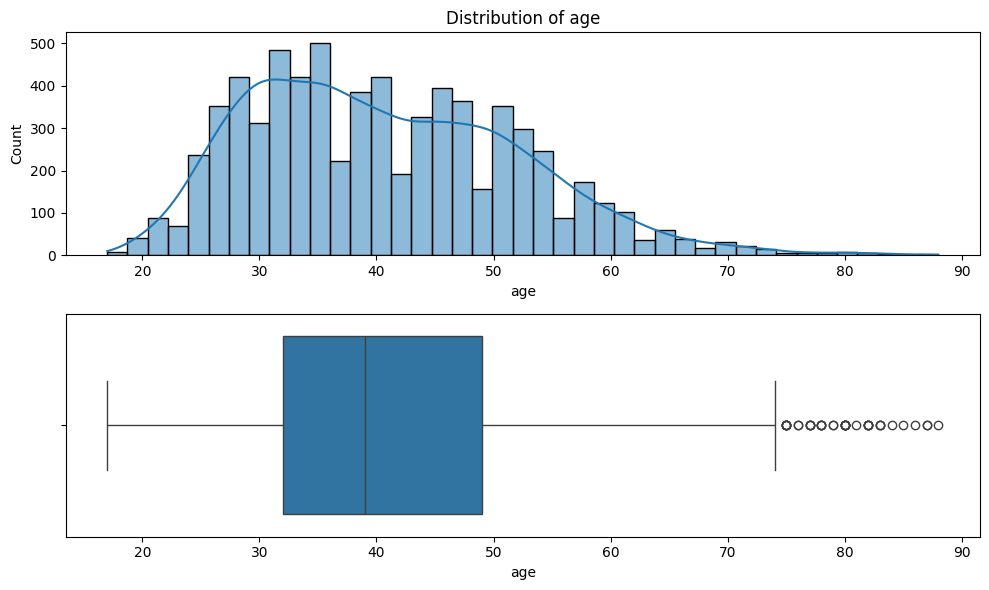

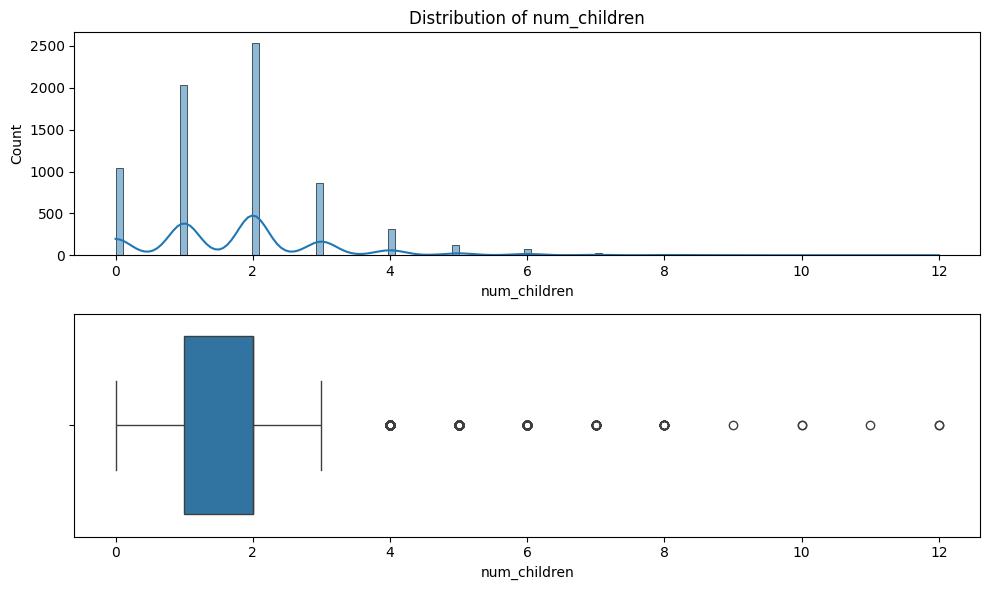

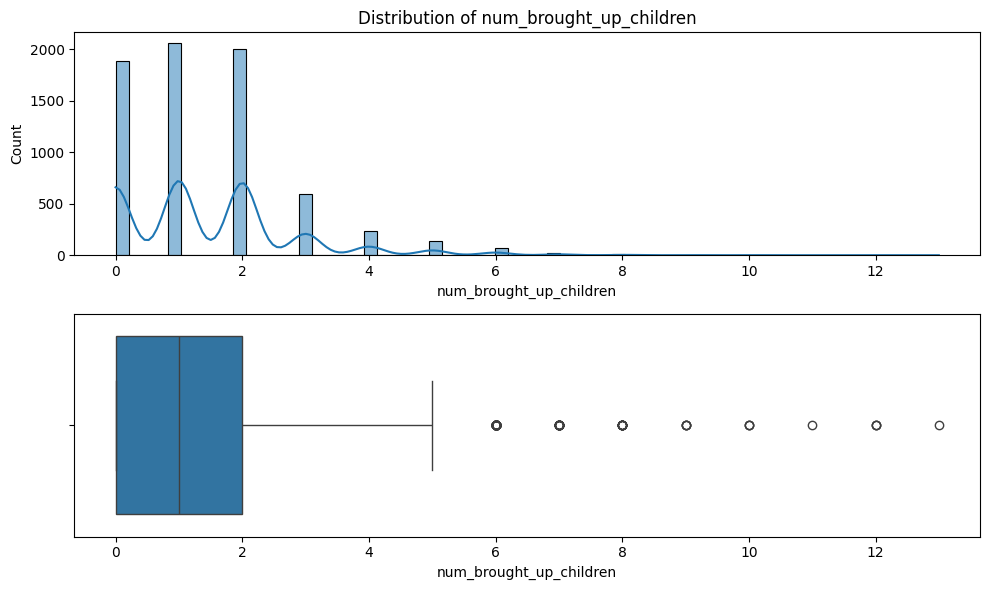

In [43]:
plot_numerical(df_eda, numerical_columns)

#### Categorical features

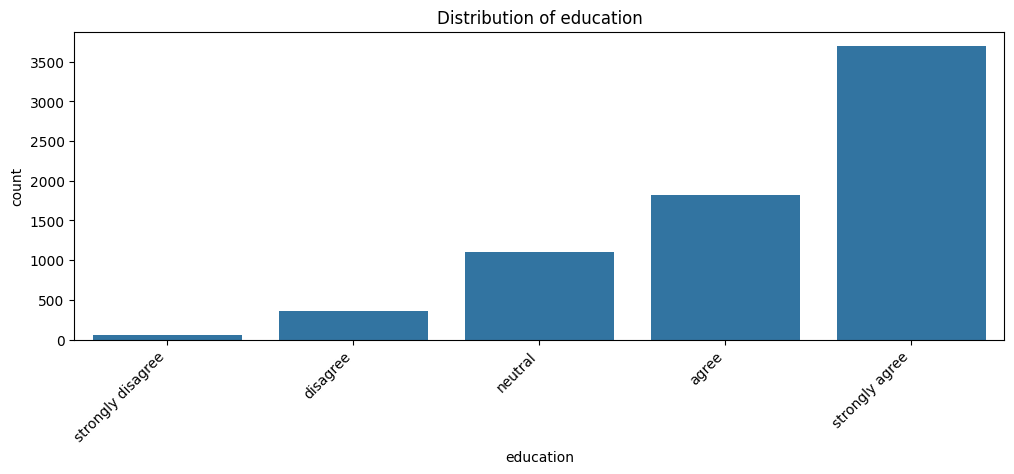

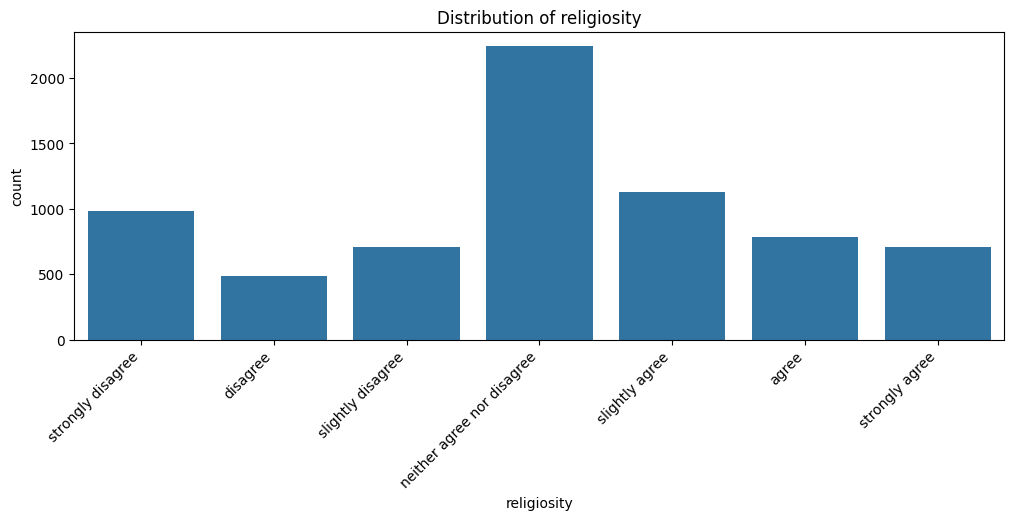

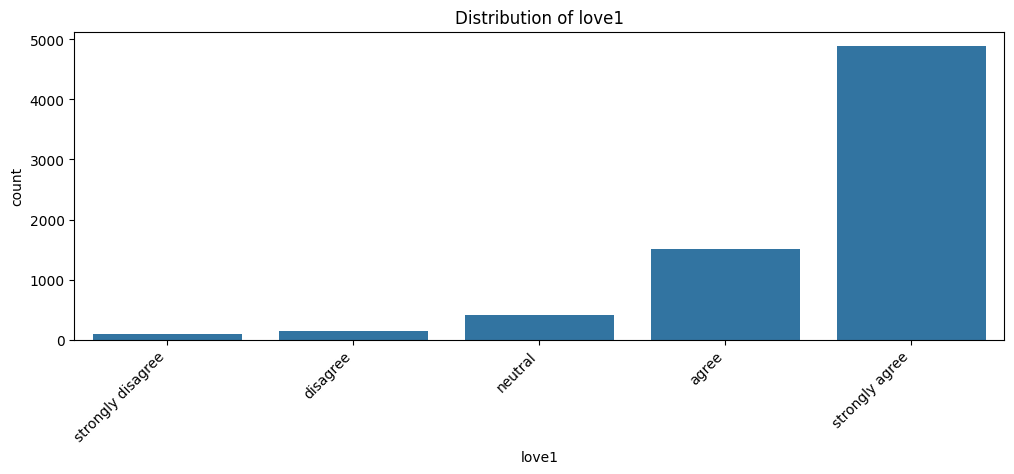

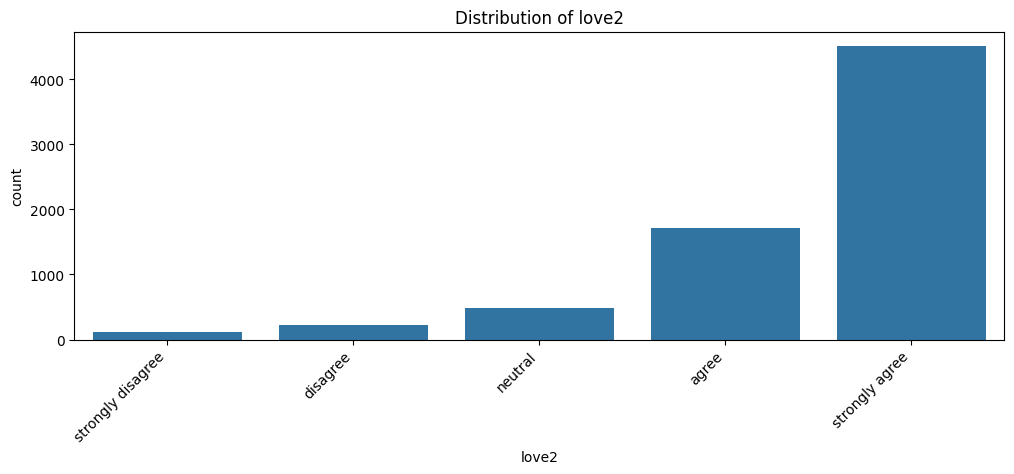

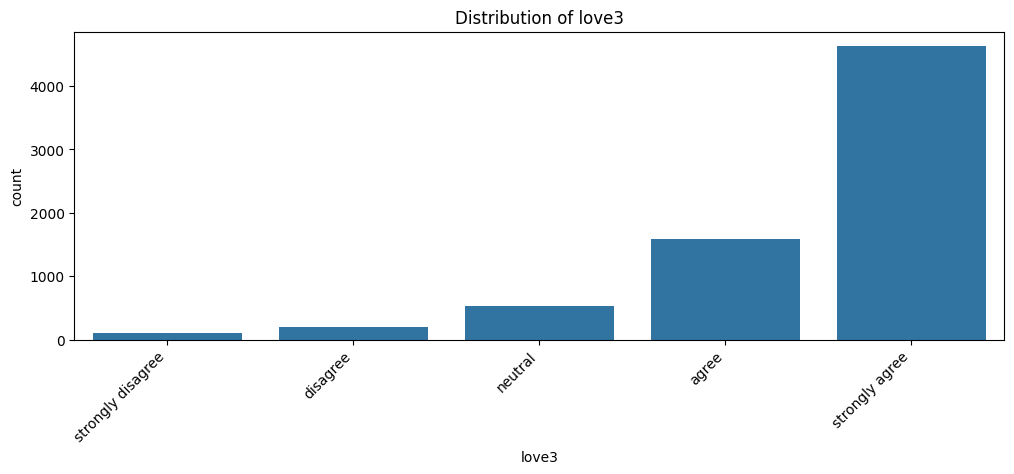

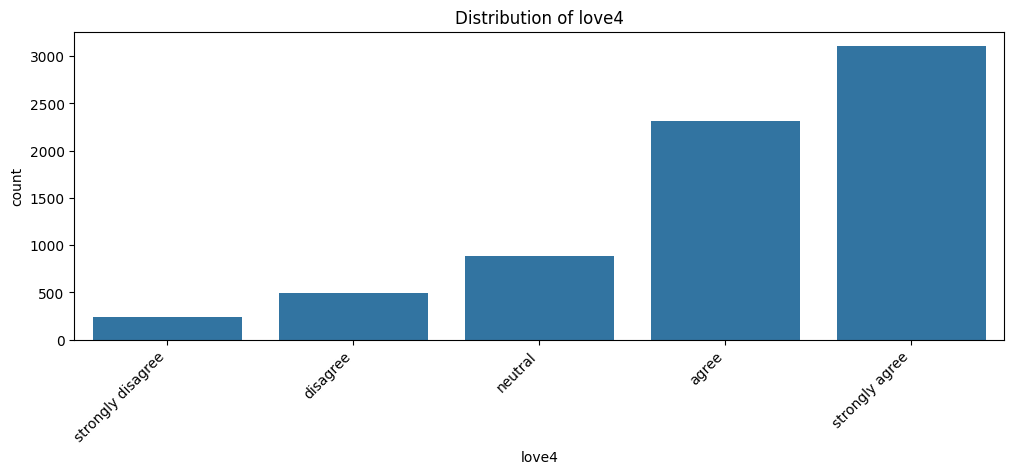

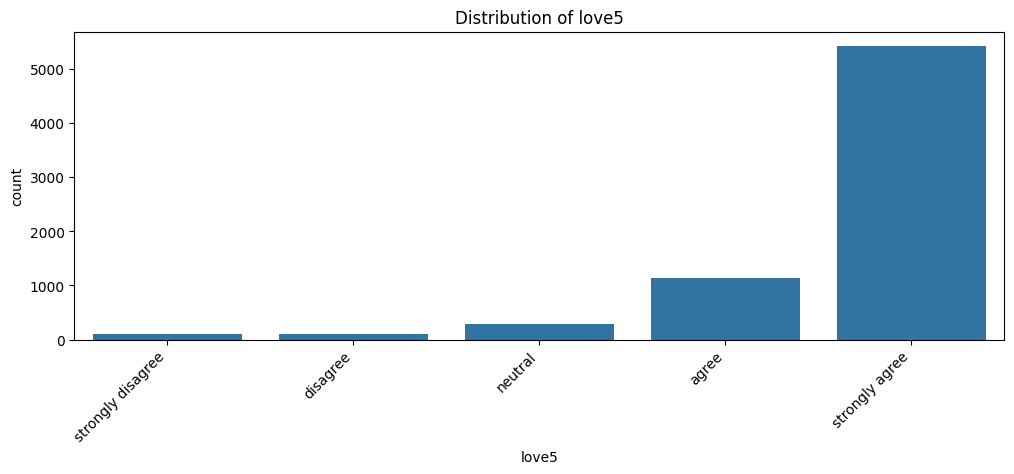

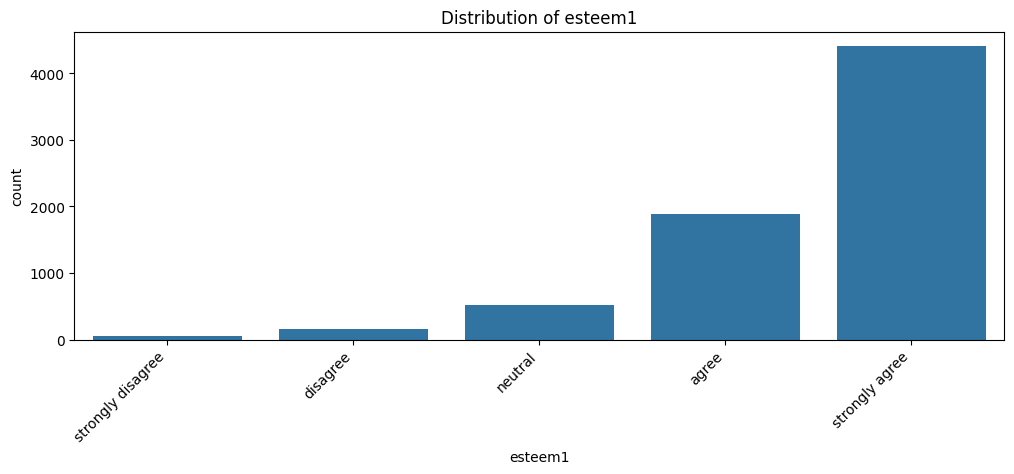

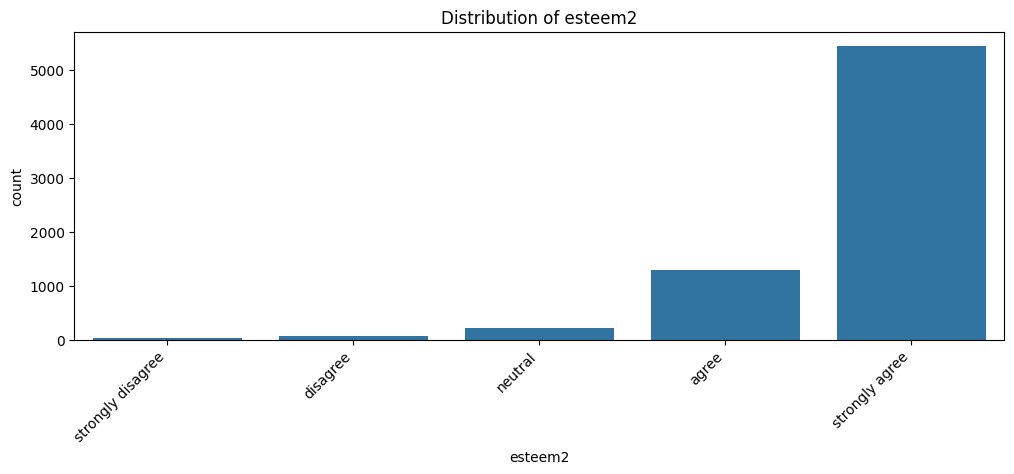

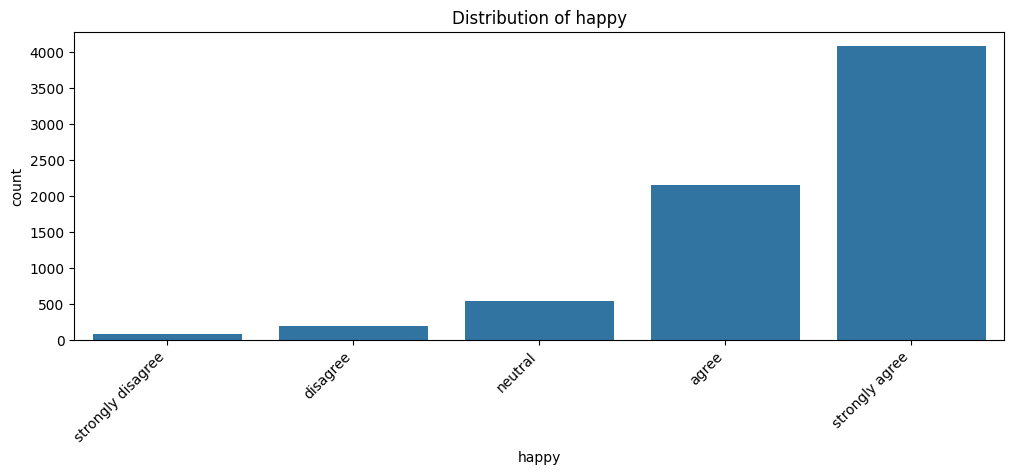

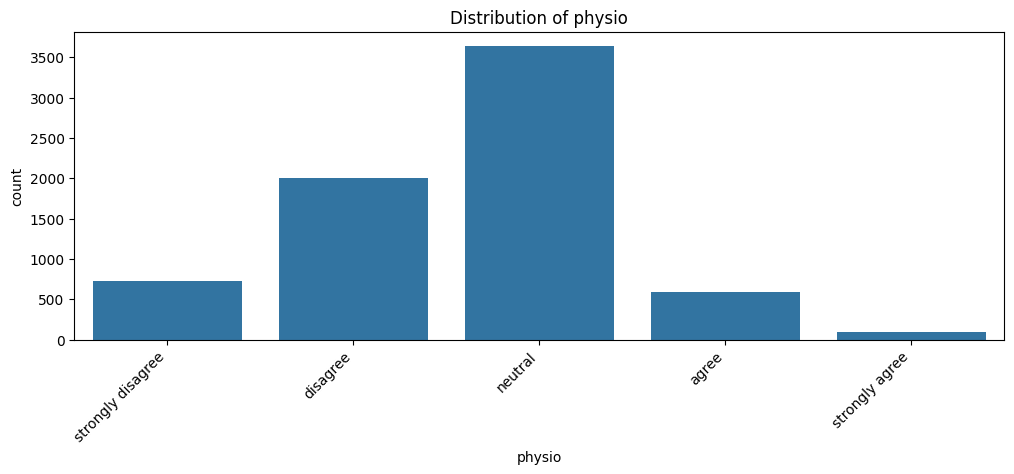

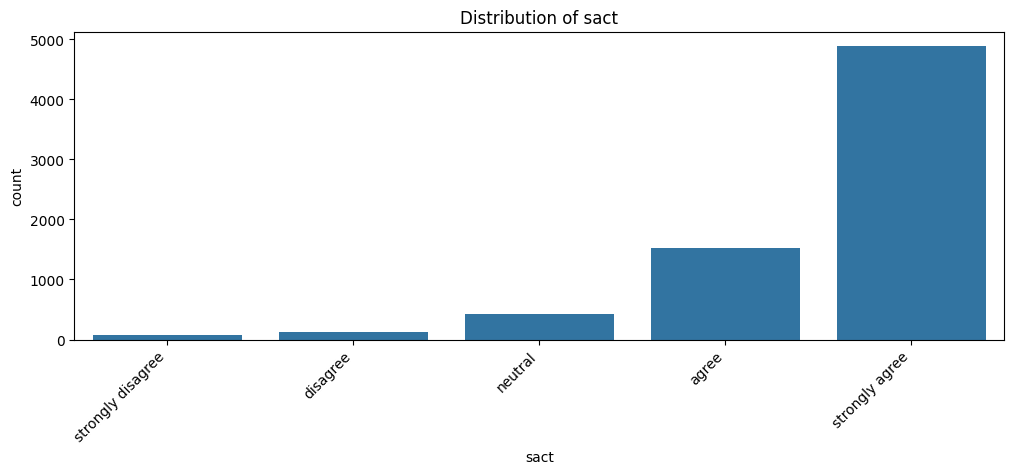

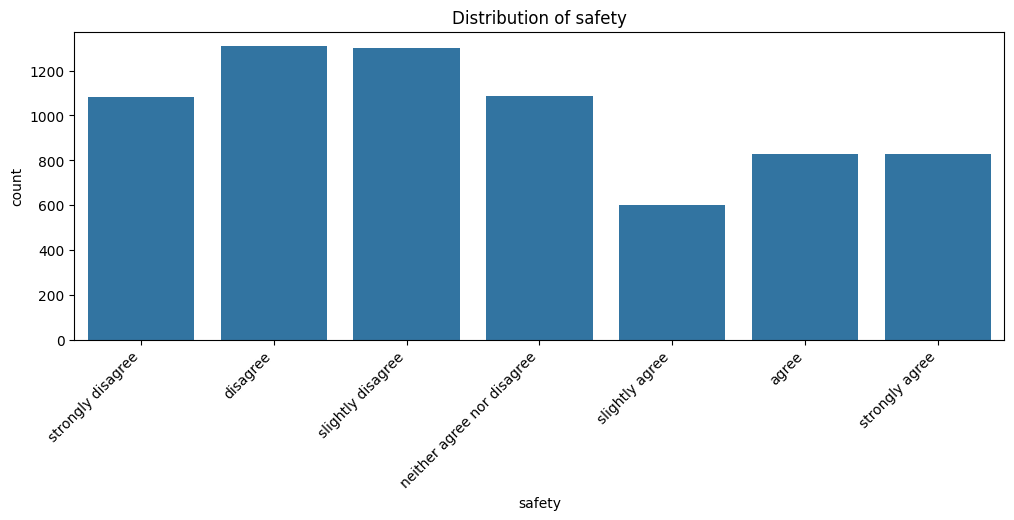

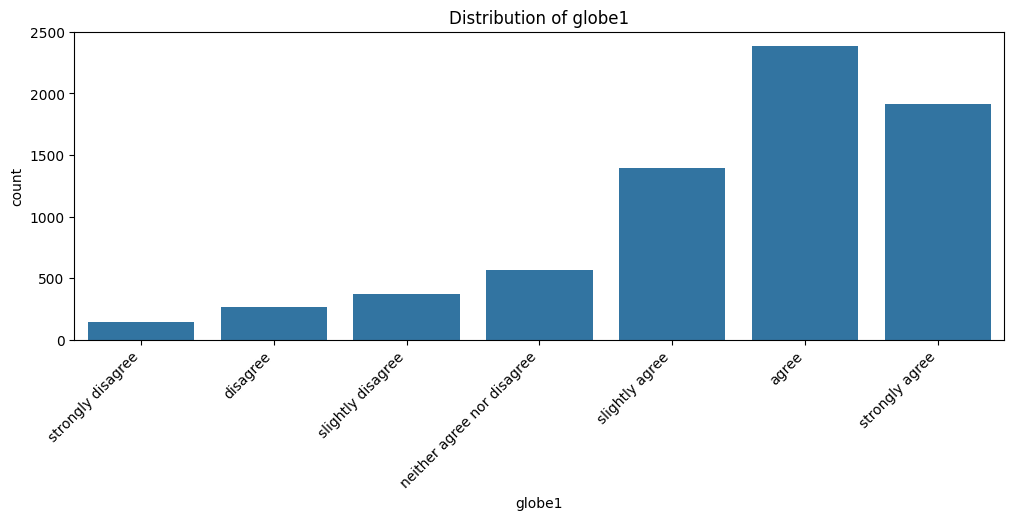

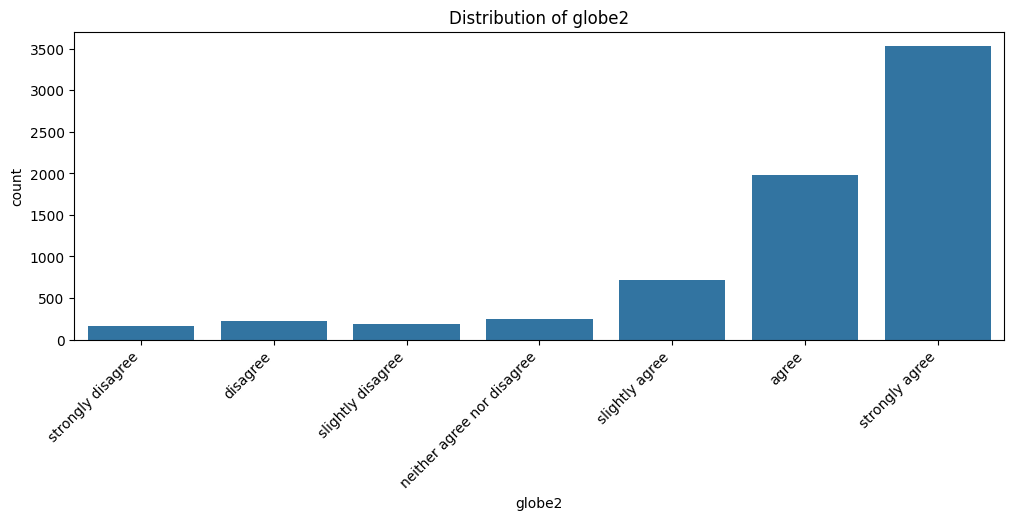

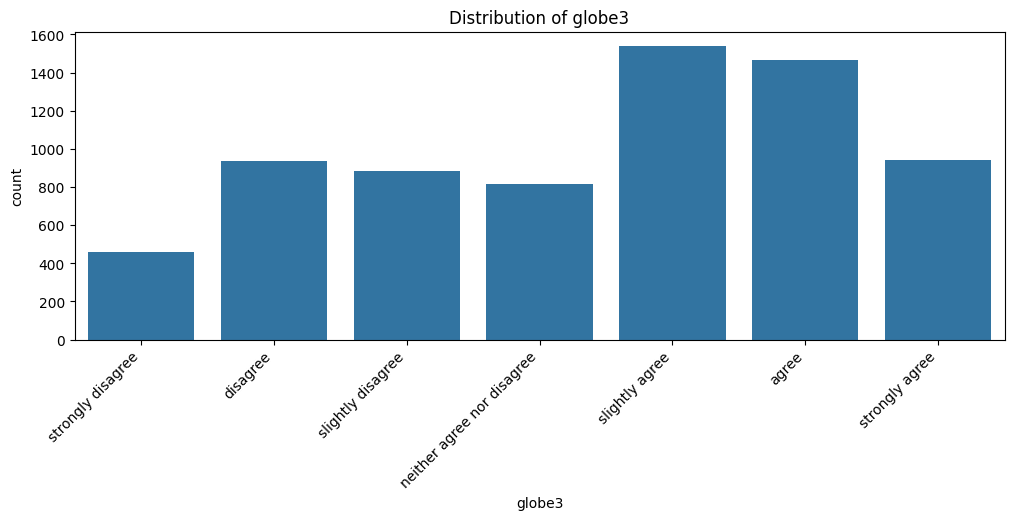

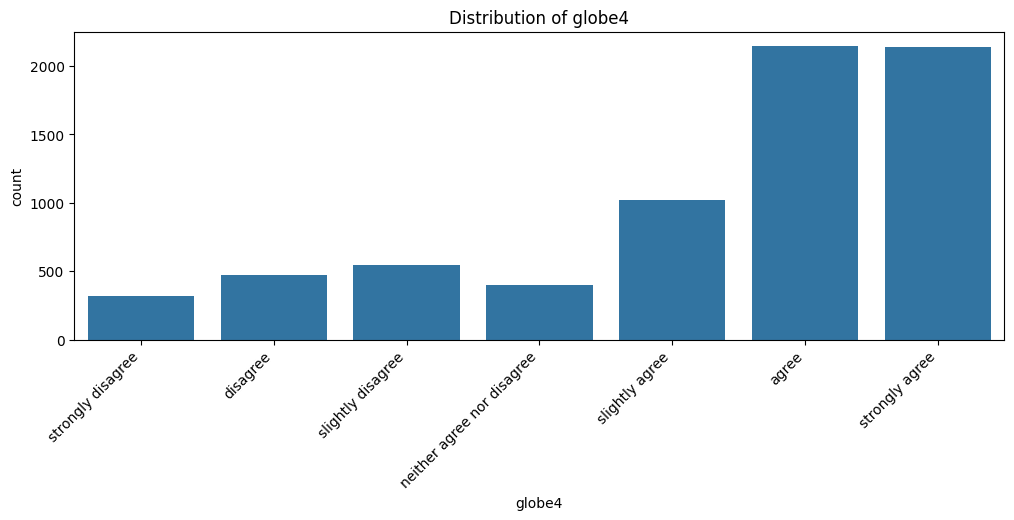

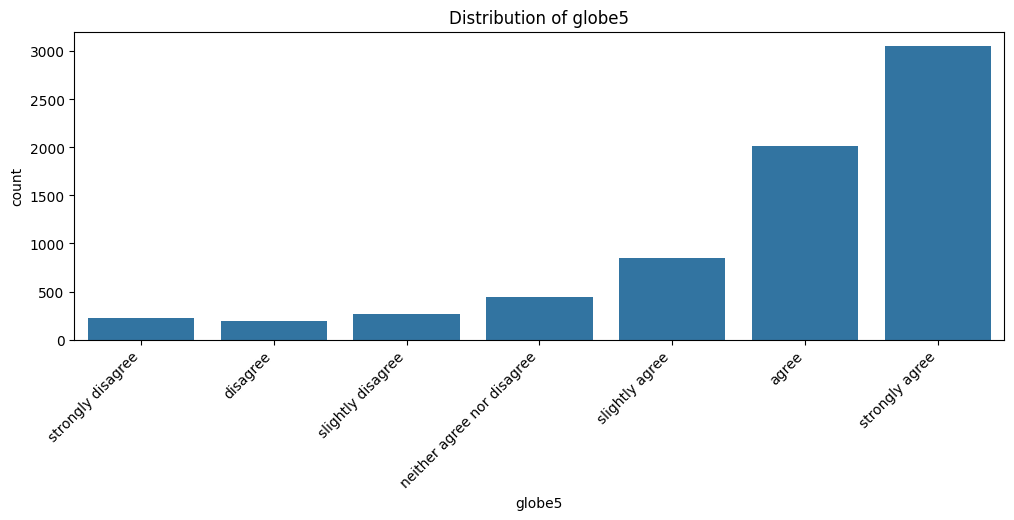

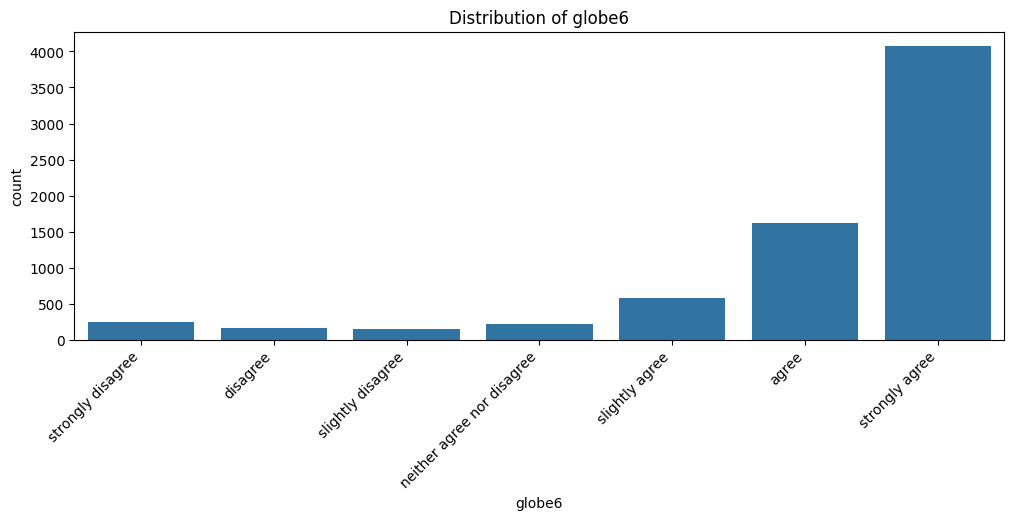

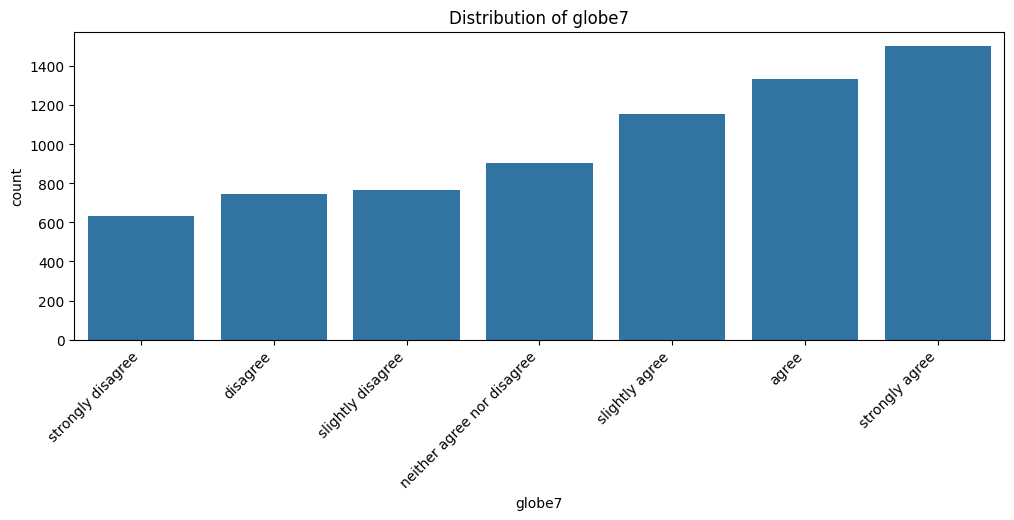

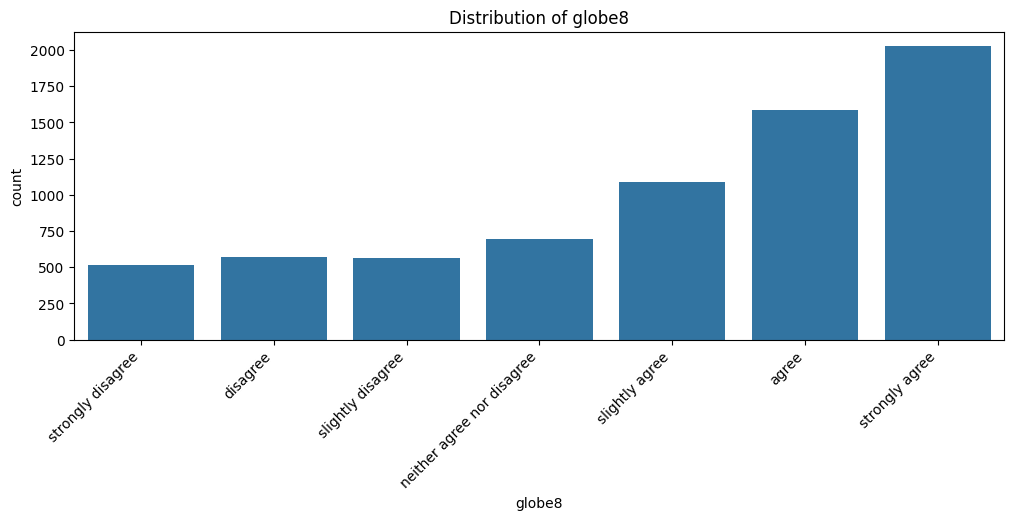

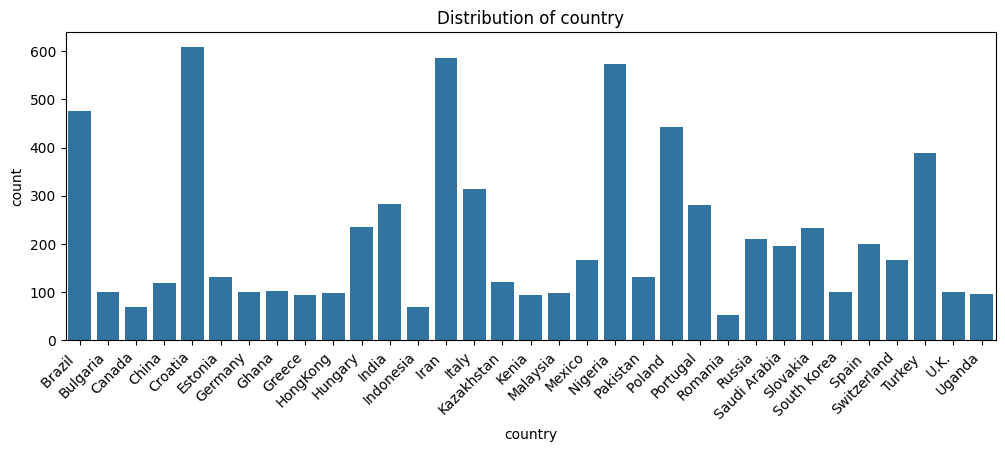

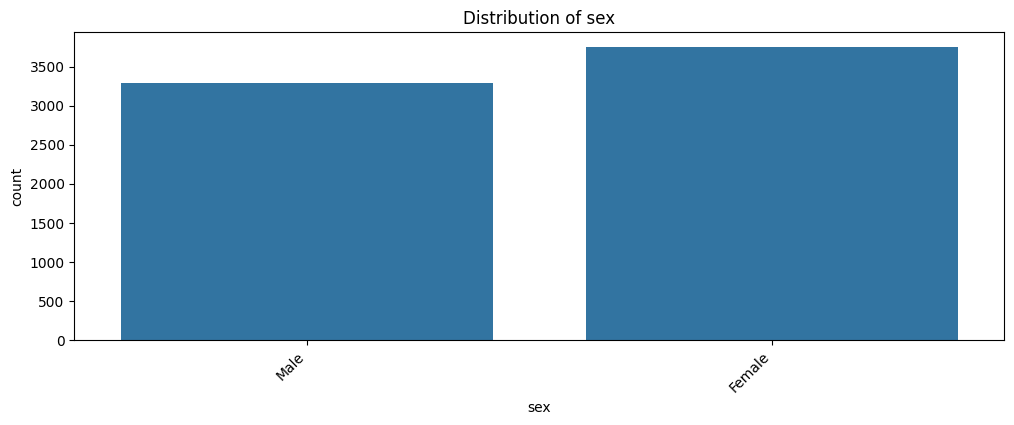

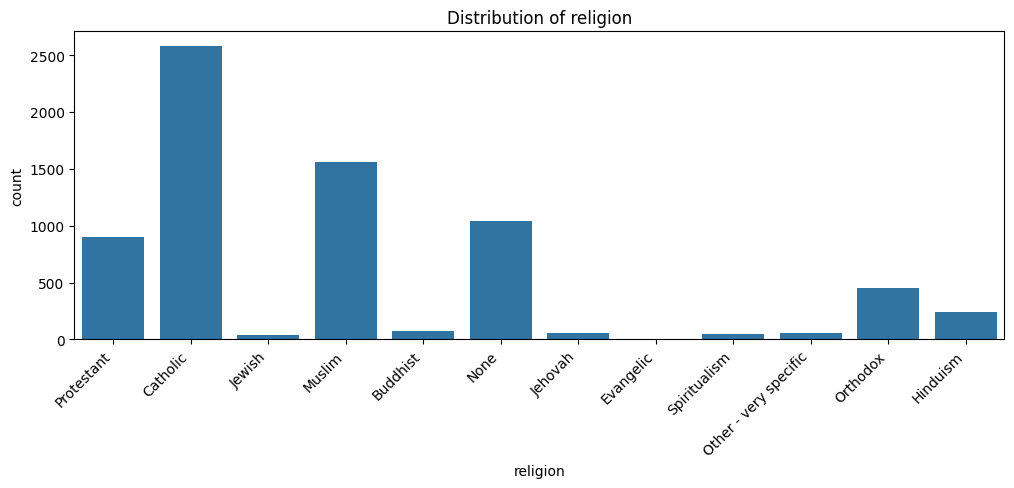

In [44]:
plot_categorical(df_eda, categorical_columns)

**Target column**

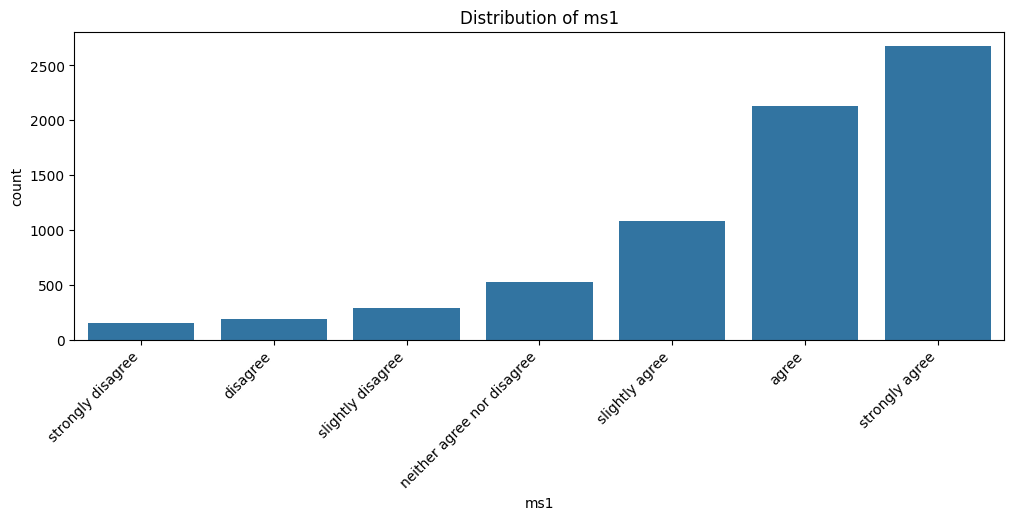

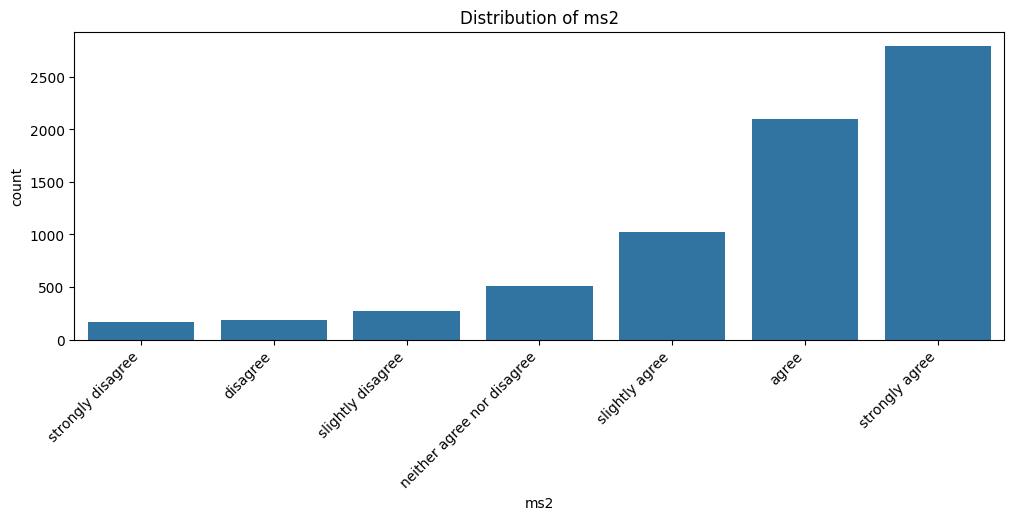

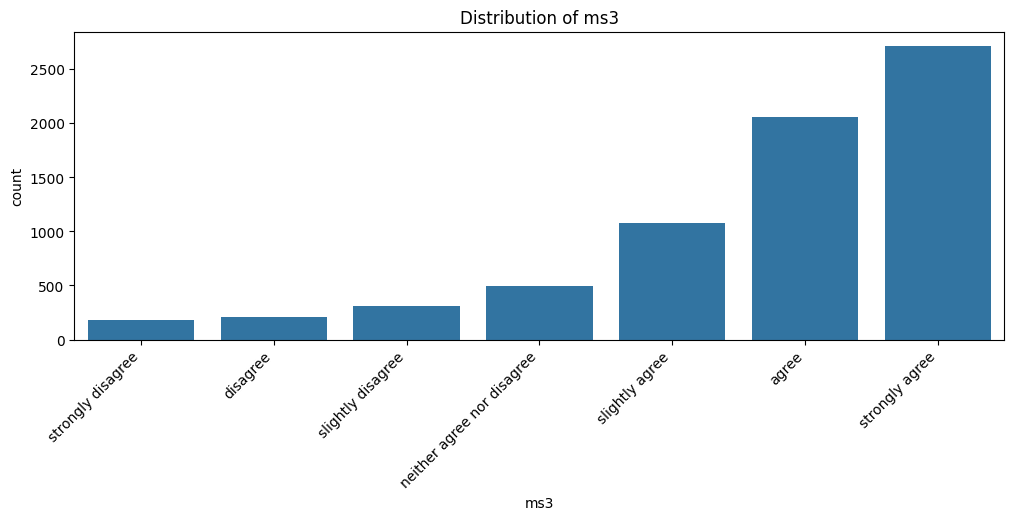

In [45]:
plot_categorical(df_eda, marital_satisfaction_columns)

### 3.3 Bivariate Analysis

**Take ms1 for bivariate analysis**

#### Categorical features

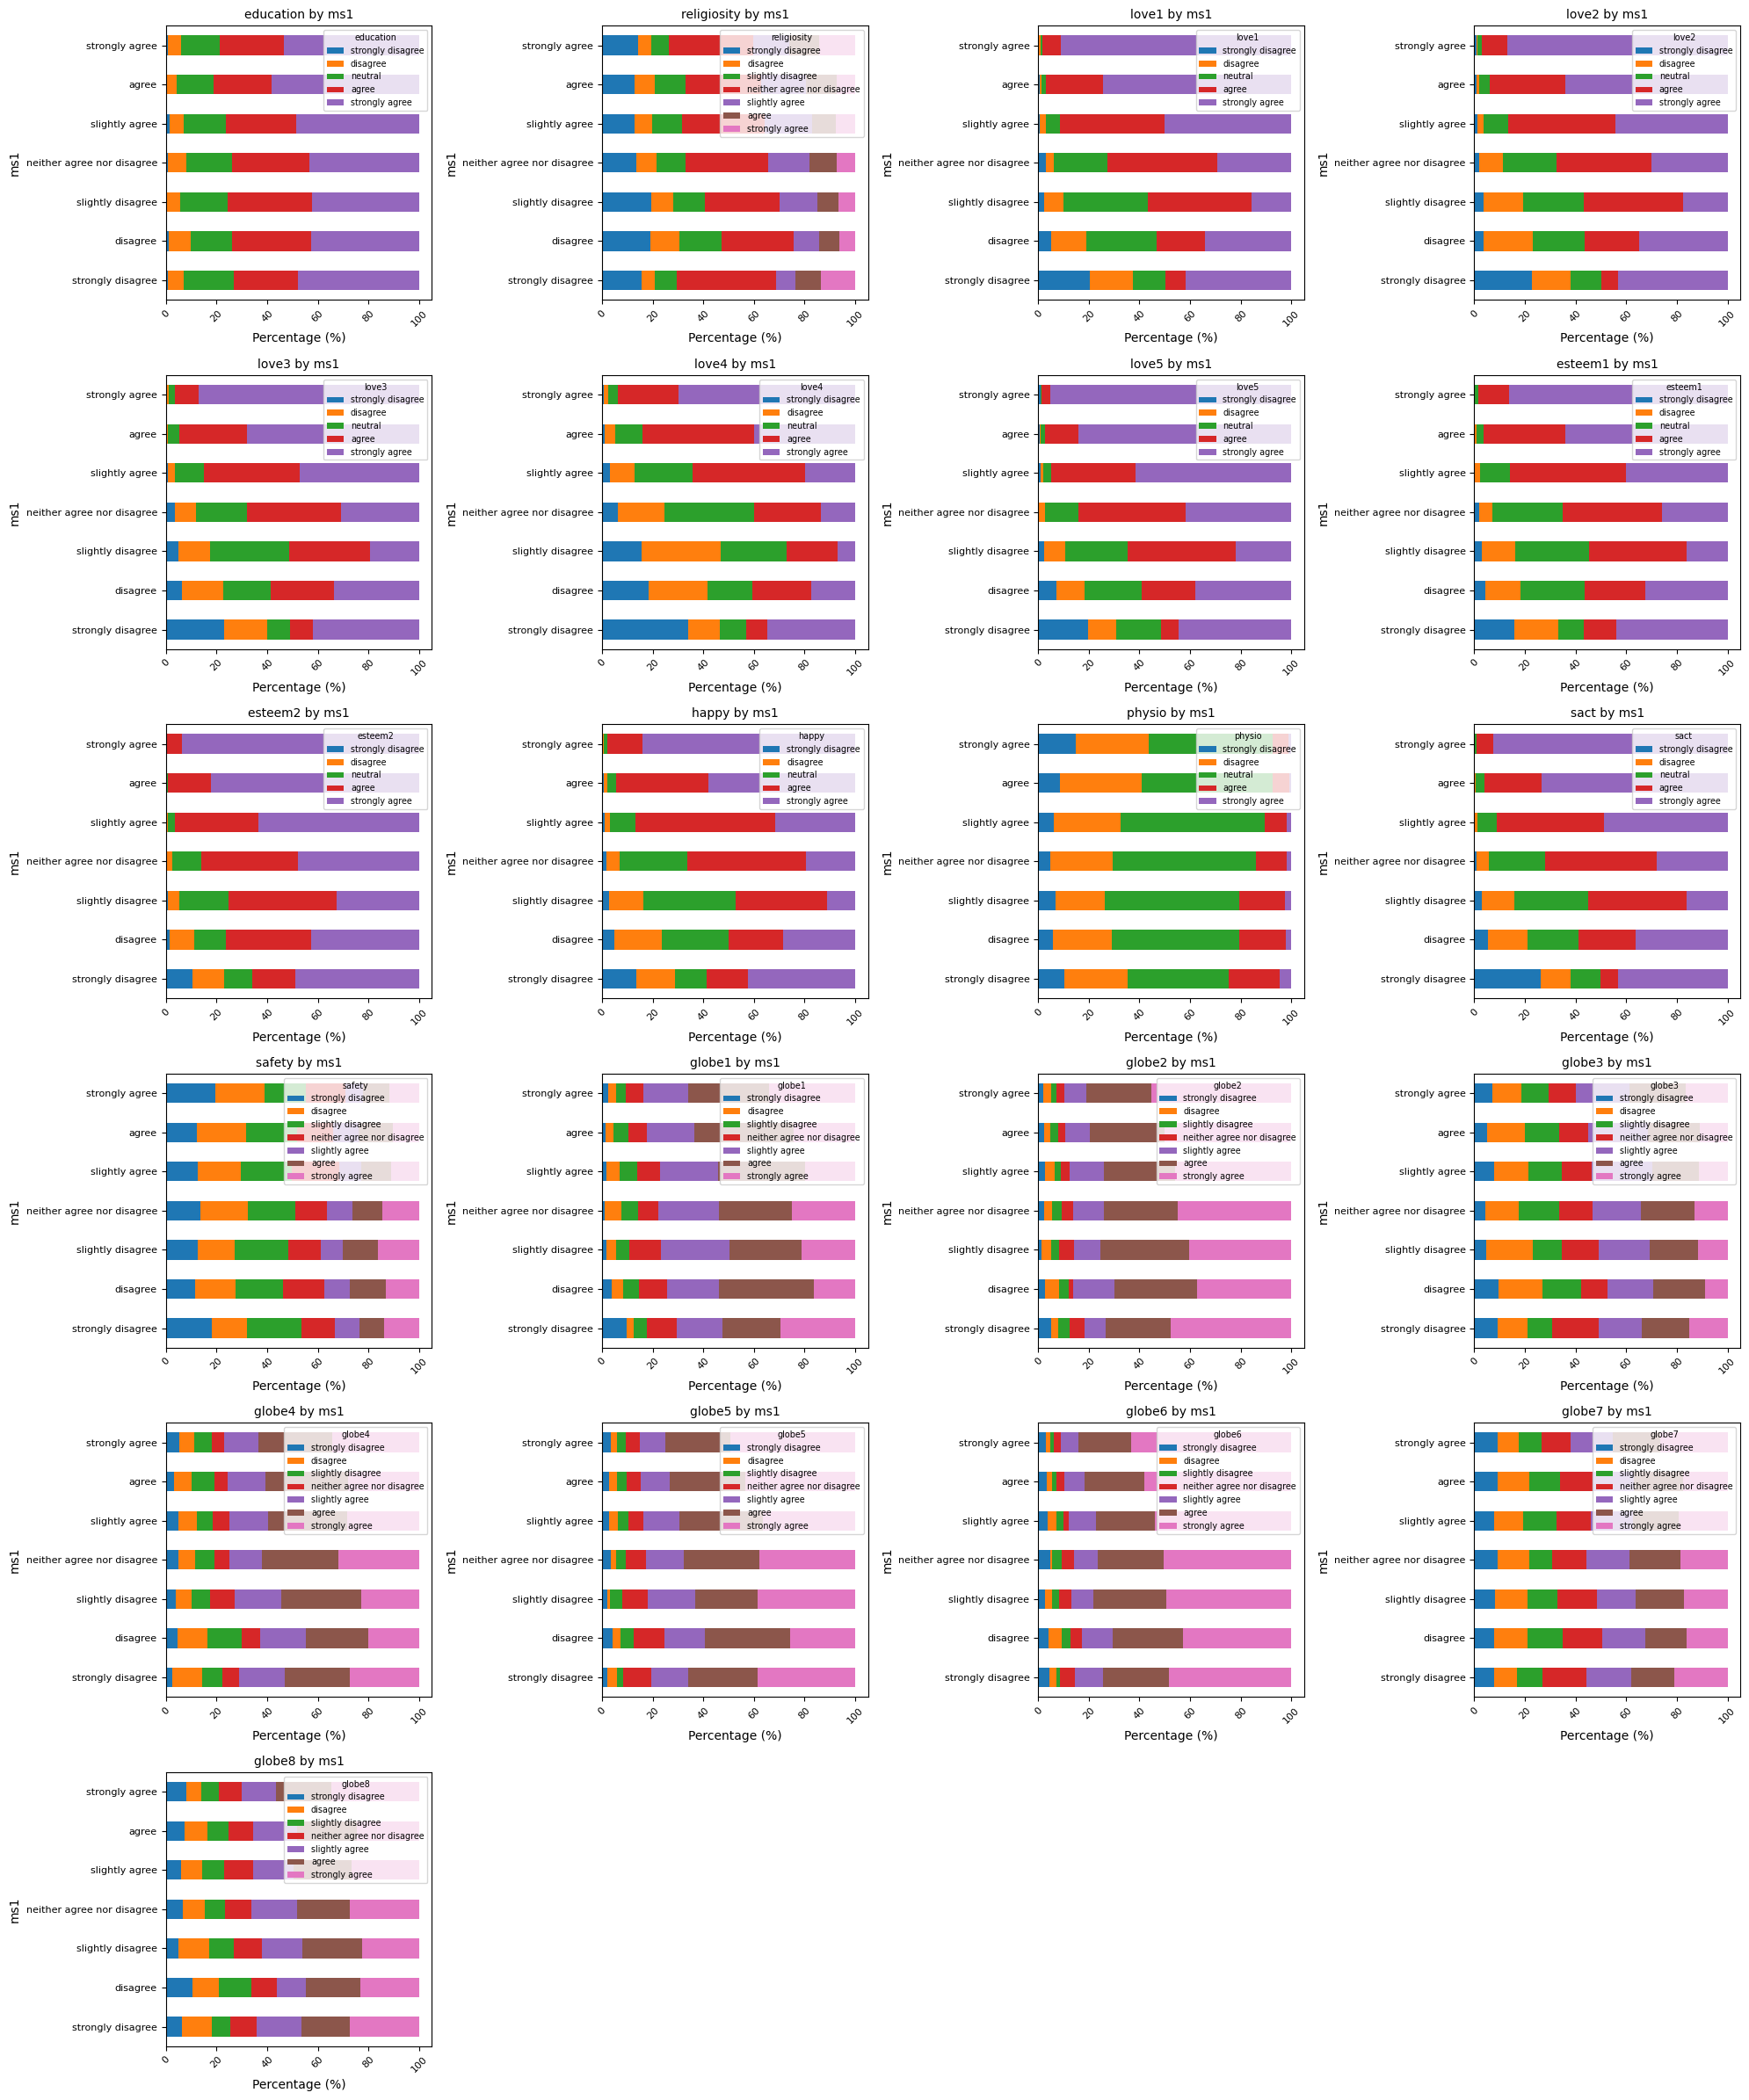

In [46]:
plot_stacked_barchart(df_eda, "ms1", ordinal_columns)

### 3.4 Multivariate Analysis

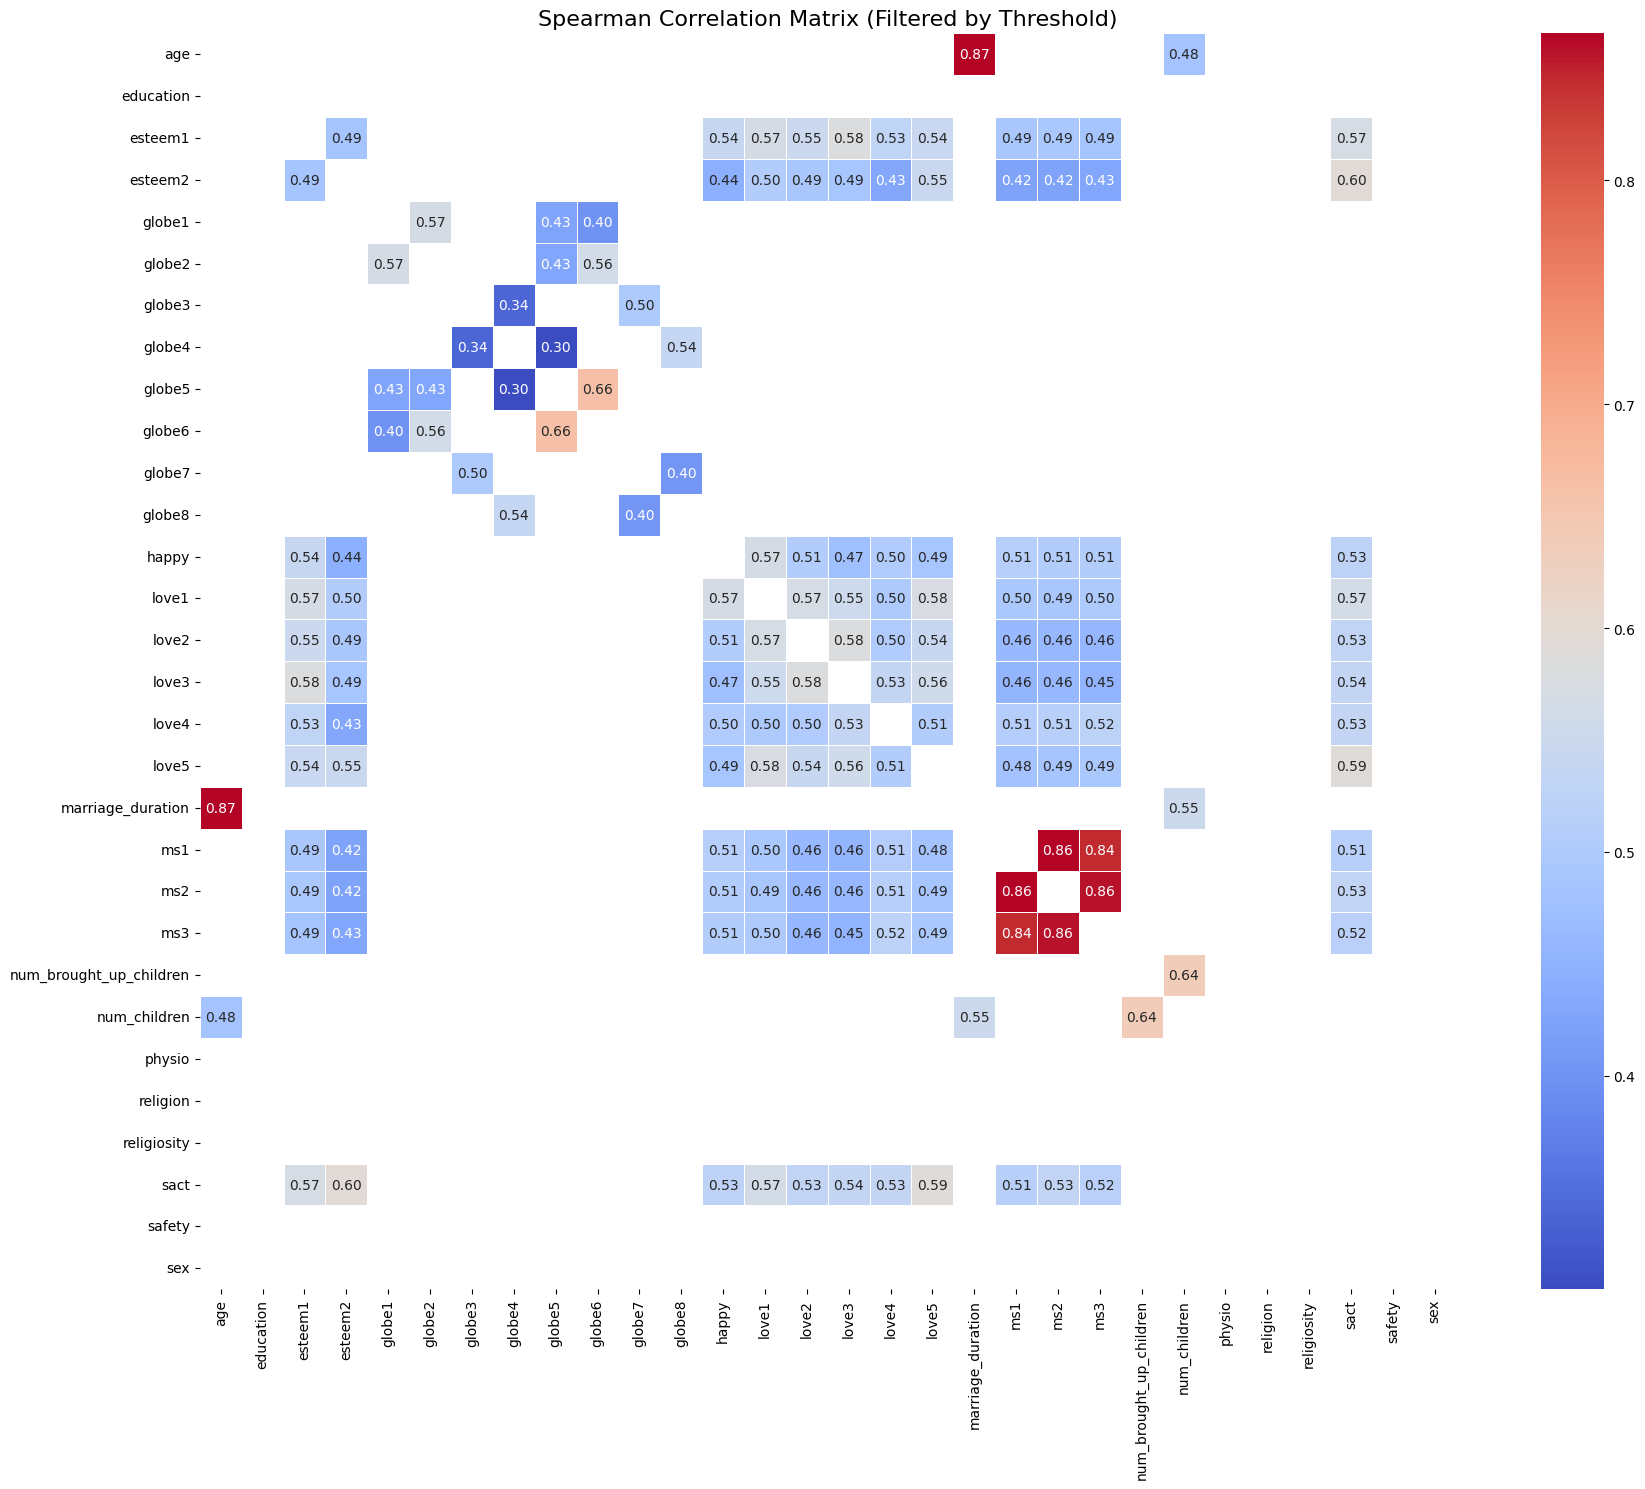

In [47]:
spearman_corr = df_cleaned.drop(columns=["country"]).corr(method="spearman")

# Set a threshold for correlation values
threshold = 0.3

# Sort the correlation matrix by column names
spearman_corr_sorted = spearman_corr.sort_index(axis=1).sort_index(axis=0)

# Mask correlations below the threshold
mask = spearman_corr_sorted.abs() < threshold
mask2 = spearman_corr_sorted == 1

# Mask the correlation matrix
spearman_corr_sorted[mask | mask2] = None

# Plot heatmap
plt.figure(figsize=(19, 15))
sns.heatmap(
    spearman_corr_sorted,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    cbar=True,
    square=True,
    linewidths=0.5,
    mask=mask,
)

plt.title("Spearman Correlation Matrix (Filtered by Threshold)", fontsize=16)
plt.tight_layout()
plt.show()

In [48]:
filtered = spearman_corr_sorted[marital_satisfaction_columns].copy()
filtered = filtered.loc[filtered.abs().max(axis=1) > threshold]
filtered = filtered[
    ~filtered.index.isin(marital_satisfaction_columns)
].sort_values(by="ms1", ascending=False)

filtered

,ms1,ms2,ms3
sact,0.514338,0.531813,0.517644
happy,0.511613,0.505854,0.507964
love4,0.509957,0.513279,0.522140
love1,0.495000,0.489154,0.497954
esteem1,0.489161,0.494360,0.485126
love5,0.480507,0.485327,0.493972
love2,0.462668,0.462281,0.458874
love3,0.455884,0.461808,0.453675
esteem2,0.423738,0.424736,0.427707


## 4. Export Data

In [51]:
df_cleaned.to_csv("marital_satisfaction_data_cleaned.csv", index=False)